## RFM ANALYSIS
### Understanding and Preparing Data 

In [48]:
import numpy as np
import pandas as pd

In [49]:
df_ = pd.read_excel('/Users/yelizsari/Downloads/VBO - Week 1/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [50]:
df = df_.copy()

In [51]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [52]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [53]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [54]:
df.dropna(subset=['Customer ID'], inplace=True)

In [55]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [56]:
df['StockCode'].nunique()

3684

In [57]:
df['StockCode'].value_counts()

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
79323W       1
90035C       1
84802B       1
20957        1
90214T       1
Name: StockCode, Length: 3684, dtype: int64

In [58]:
df['StockCode'].value_counts().nlargest(5)

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
Name: StockCode, dtype: int64

In [59]:
filt = df["Invoice"].str.contains("C")==True
df.drop(index=df[filt].index, inplace=True)

In [60]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [61]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Calculating RFM Metrics

In [62]:
from datetime import datetime

In [63]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [64]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"] = df["InvoiceDate"].apply(lambda t: t.date())
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [65]:
my_date = pd.to_datetime(['2011-12-10'])
rfm = df.groupby(['Customer ID']).agg({'InvoiceDate':  lambda x: (my_date - x.max()).days,
                               'Invoice': lambda x: x.nunique(),
                               'TotalPrice': lambda x: x.sum()})

In [66]:
rfm.rename(columns={'InvoiceDate': 'Recency',
                         'Invoice': 'Frequency',
                         'TotalPrice': 'Monetary'}, inplace=True)

In [67]:
filt2 = rfm["Monetary"] < 0
rfm.drop(index=rfm[filt2].index, inplace=True)

### Calculating RFM Scores

In [68]:
r_values = [5, 4, 3, 2, 1]
f_values = [1, 2, 3, 4, 5]

In [69]:
rfm['r_score'] = pd.qcut(rfm['Recency'], q=5, labels=r_values)
rfm['f_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=f_values)

rfm.head()

,Recency,Frequency,Monetary,r_score,f_score
Customer ID,,,,,
12346.0,326,1,77183.60,1,1
12347.0,3,7,4310.00,5,5
12348.0,76,4,1797.24,2,4
12349.0,19,1,1757.55,4,1
12350.0,311,1,334.40,1,1


In [70]:
rfm['RFM_Score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str)

### RFM Segmentation

In [71]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'}

In [72]:
rfm['RFM_Segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)

In [73]:
rfm['RFM_Segment'].value_counts()

hibernating            1071
loyal_customers         819
champions               633
at_Risk                 593
potential_loyalists     484
about_to_sleep          352
need_attention          187
promising                95
cant_loose               63
new_customers            42
Name: RFM_Segment, dtype: int64

In [74]:
customer_ids = pd.DataFrame(rfm[rfm['RFM_Segment'] == 'loyal_customers'].index)

In [75]:
customer_ids.to_excel('loyal_customers.xlsx')

## K-MEANS CLUSTERING

In [76]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [77]:
new_df = rfm[['Recency', 'Frequency']].reset_index(drop=True)

#### Standard Scaling

In [78]:
scaler1 = StandardScaler()
df_scaled1 = scaler1.fit_transform(new_df)

In [79]:
df_scaled1 = pd.DataFrame(df_scaled1)
df_scaled1.columns = ['Recency', 'Frequency']

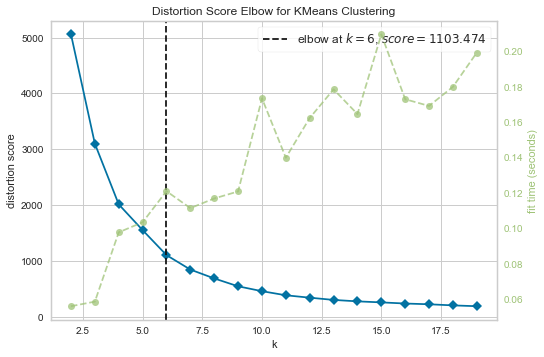

In [80]:
kmeans1 = KMeans()
elbow1 = KElbowVisualizer(kmeans1, k=(2,20))
elbow1.fit(df_scaled1)
elbow1.show();

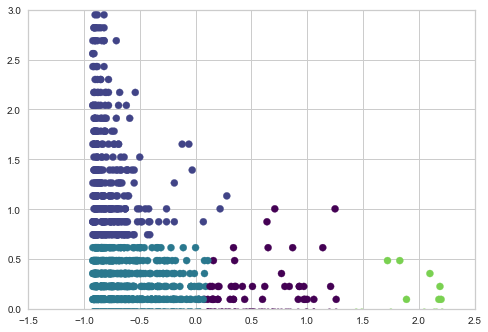

In [90]:
kmeans1 = KMeans(n_clusters=6)
k_fit = kmeans1.fit(df_scaled1)

clusters1 = kmeans1.labels_

plt.scatter(df_scaled1['Recency'], df_scaled1['Frequency'], c=clusters1, s=50, cmap='viridis')
plt.xlim([-1.5, 2.5])
plt.ylim([0, 3])
plt.show()

#### MinMaxScaling

In [82]:
scaler2 = MinMaxScaler((0,1))
df_scaled2 = scaler1.fit_transform(new_df)

In [83]:
df_scaled2 = pd.DataFrame(df_scaled2)
df_scaled2.columns = ['Recency', 'Frequency']

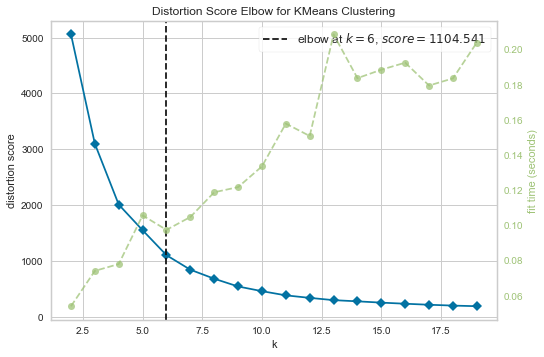

In [84]:
kmeans2 = KMeans()
elbow2 = KElbowVisualizer(kmeans2, k=(2,20))
elbow2.fit(df_scaled2)
elbow2.show();

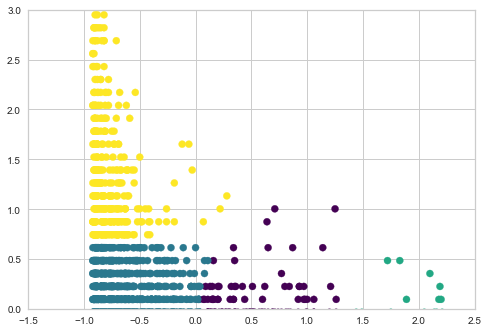

In [89]:
kmeans2 = KMeans(n_clusters=6)
k_fit = kmeans2.fit(df_scaled2)

clusters2 = kmeans2.labels_

plt.scatter(df_scaled2['Recency'], df_scaled2['Frequency'], c=clusters2, s=50, cmap='viridis')
plt.xlim([-1.5, 2.5])
plt.ylim([0, 3])
plt.show()